# **Predicting Osteoporosis Risk**

## Problem Statement:

Osteoporosis, a condition characterized by weakened bones and an increased risk of fractures, poses significant health challenges, especially among aging populations. Early detection and prevention are critical to reducing the incidence of osteoporosis-related fractures, improving patient outcomes, and optimizing healthcare resources.

The healthcare provider seeks to leverage machine learning to accurately predict the risk of osteoporosis in patients based on their characteristics and medical history. This involves understanding the complex relationships between various factors, such as age, hormonal changes, nutrition, lifestyle habits, and medical conditions, and how they contribute to osteoporosis risk.

This project aims to provide actionable insights into osteoporosis risk factors and enable the healthcare provider to enhance patient care through early detection and tailored interventions.


## About the dataset

1. **Id**: This is likely a unique identifier for each individual in your dataset.

2. **Age**: Age of the individual, which is a significant factor in osteoporosis risk as bone density tends to decrease with age.

3. **Gender**: Gender can influence osteoporosis risk, as women are generally at a higher risk compared to men, especially after menopause due to hormonal changes.

4. **Hormonal Changes**: Hormonal changes, particularly in women (such as menopause), can affect bone density and increase the risk of osteoporosis.

5. **Family History**: Family history of osteoporosis or fractures can indicate a genetic predisposition to the condition.

6. **Race/Ethnicity**: Different racial and ethnic groups have varying rates of osteoporosis and fracture risk due to genetic and lifestyle factors.

7. **Body Weight**: Body weight can influence bone density, with lower body weight sometimes associated with higher risk of osteoporosis.

8. **Calcium Intake**: Adequate calcium intake is important for maintaining bone health, and low calcium intake can increase the risk of osteoporosis.

9. **Vitamin D Intake**: Vitamin D is essential for calcium absorption and bone health, and inadequate intake can increase the risk of osteoporosis.

10. **Physical Activity**: Regular physical activity, particularly weight-bearing exercises, can help maintain bone density and reduce the risk of osteoporosis.

11. **Smoking**: Smoking is a risk factor for osteoporosis as it can interfere with bone metabolism and decrease bone density.

12. **Alcohol Consumption**: Excessive alcohol consumption can negatively impact bone health and increase the risk of osteoporosis.

13. **Medical Conditions**: Certain medical conditions, such as rheumatoid arthritis or gastrointestinal disorders, can affect bone health and increase osteoporosis risk.

14. **Medications**: Some medications, such as corticosteroids or certain anti-seizure drugs, can weaken bones and increase the risk of osteoporosis.

15. **Prior Fractures**: History of prior fractures can indicate existing bone fragility and increase the risk of future fractures, including those associated with osteoporosis.

16. **Osteoporosis**: This column likely indicates the presence or absence of osteoporosis in the individual, serving as thes risk of developing osteoporosis.

## **Importing Libararies**

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# **Data Exploration**

In [ ]:
df = pd.read_csv('osteoporosis.csv')

In [ ]:
df.head(2)

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1


In [ ]:
df.shape

(1958, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1958.0,105515.320735,2589.407806,101008.0,103348.5,105469.0,107755.0,109996.0
Age,1958.0,39.101124,21.355424,18.0,21.0,32.0,53.0,90.0
Osteoporosis,1958.0,0.500000,0.500128,0.0,0.0,0.5,1.0,1.0


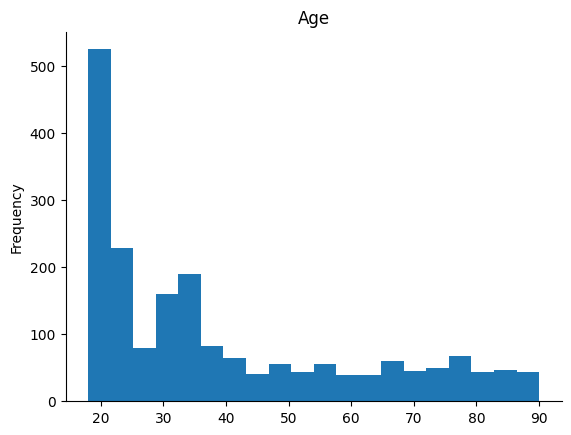

In [ ]:
# @title Age Distribution

df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

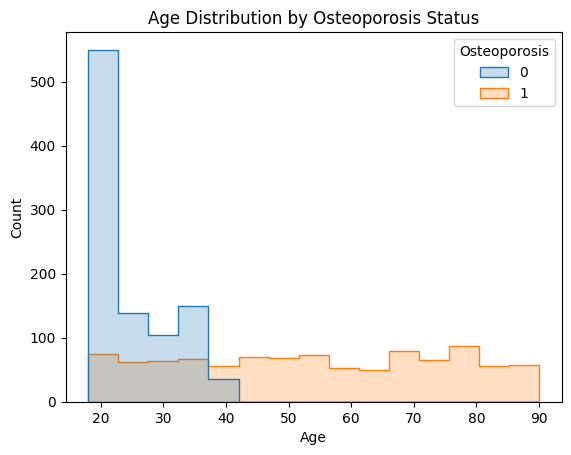

In [ ]:
# @title Age Distribution by Osteoporosis Status

sns.histplot(data=df, x='Age', hue='Osteoporosis', element='step')
plt.title('Age Distribution by Osteoporosis Status')
plt.xlabel('Age')
_ = plt.ylabel('Count')


The distribution shows a significant concentration in the younger age groups, tapering off for older patients. This could influence osteoporosis predictions, as age is a critical factor.

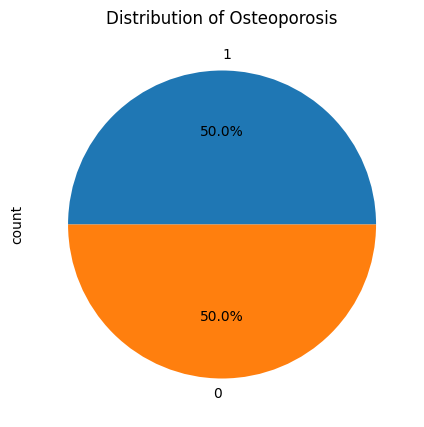

In [ ]:
# @title Osteoporosis Distribution

plt.figure(figsize=(5,5))
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Distribution of Osteoporosis');

The classes are perfectly balanced, with 50% of the samples labeled as 0 (no osteoporosis) and 50% labeled as 1 (osteoporosis).

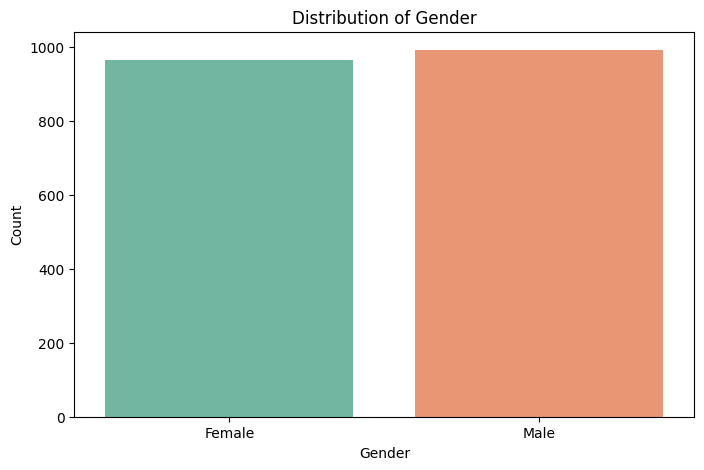

In [ ]:
# @title Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Counts: 992 males and 966 females.
Males and females are roughly evenly distributed.

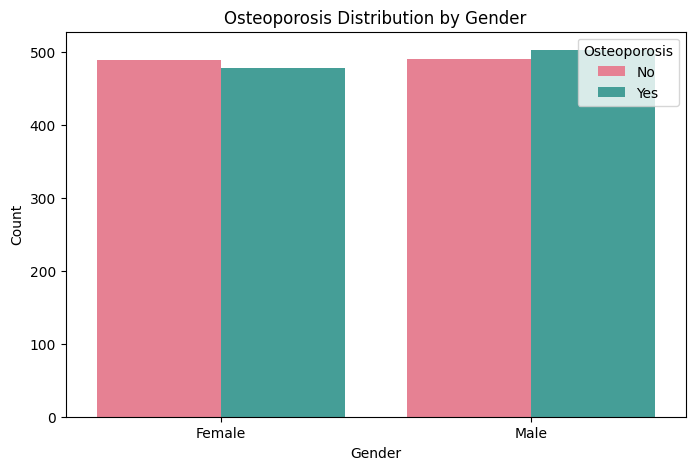

In [ ]:
# @title Osteoporosis by Gender

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Osteoporosis', palette='husl')
plt.title("Osteoporosis Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Osteoporosis", labels=["No", "Yes"])
plt.show()

A higher proportion of females are affected by osteoporosis compared to males, aligning with known gender-specific risks.

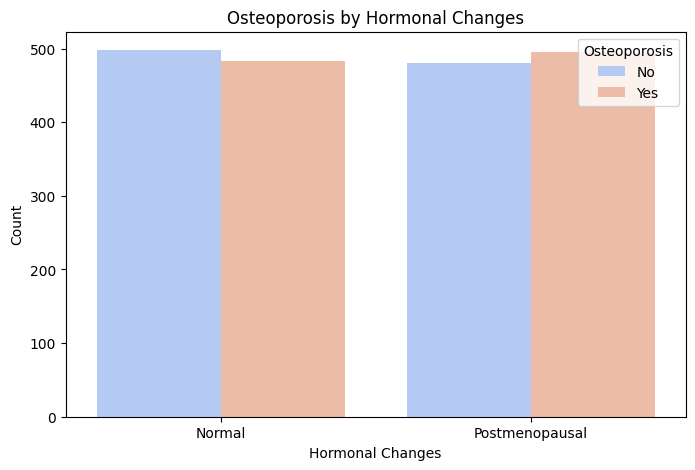

In [ ]:
# @title Hormonal Changes vs Osteoporosis

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Hormonal Changes', hue='Osteoporosis', palette='coolwarm')
plt.title("Osteoporosis by Hormonal Changes")
plt.xlabel("Hormonal Changes")
plt.ylabel("Count")
plt.legend(title="Osteoporosis", labels=["No", "Yes"])
plt.show()

Counts: 981 with normal hormonal status and 977 postmenopausal.
Postmenopausal individuals have a significantly higher risk of osteoporosis.

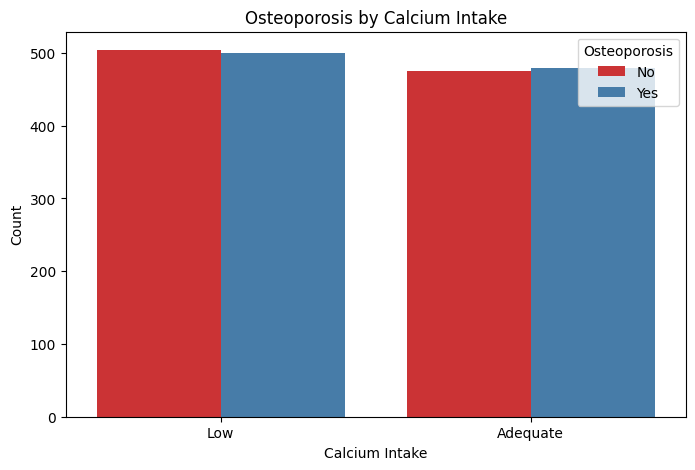

In [ ]:
# @title Calcium Intake vs Osteoporosis

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Calcium Intake', hue='Osteoporosis', palette='Set1')
plt.title("Osteoporosis by Calcium Intake")
plt.xlabel("Calcium Intake")
plt.ylabel("Count")
plt.legend(title="Osteoporosis", labels=["No", "Yes"])
plt.show()

Counts: 1004 low and 954 adequate.
Low calcium intake is associated with a higher incidence of osteoporosis.

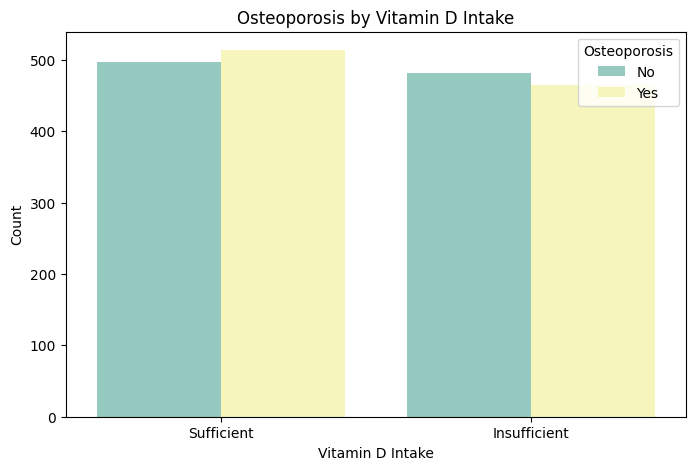

In [ ]:
# @title Vitamin D Intake vs Osteoporosis

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Vitamin D Intake', hue='Osteoporosis', palette='Set3')
plt.title("Osteoporosis by Vitamin D Intake")
plt.xlabel("Vitamin D Intake")
plt.ylabel("Count")
plt.legend(title="Osteoporosis", labels=["No", "Yes"])
plt.show()

Counts: 1011 sufficient and 947 insufficient.
Insufficient Vitamin D intake correlates with increased osteoporosis risk.

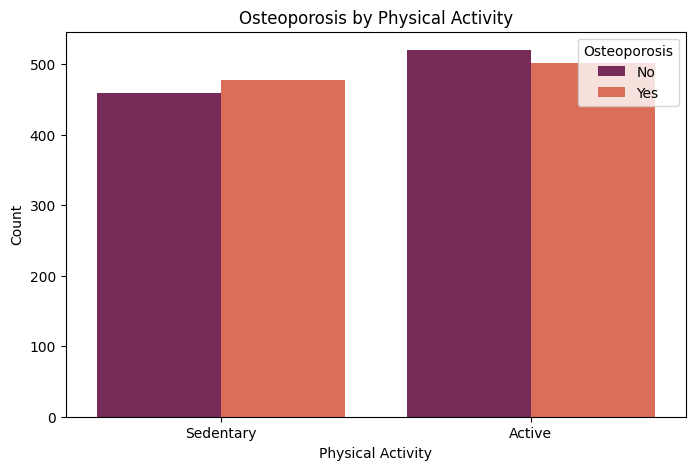

In [ ]:
# @title Physical Activity vs Osteoporosis

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Physical Activity', hue='Osteoporosis', palette='rocket')
plt.title("Osteoporosis by Physical Activity")
plt.xlabel("Physical Activity")
plt.ylabel("Count")
plt.legend(title="Osteoporosis", labels=["No", "Yes"])
plt.show()

Counts: 1021 active and 937 sedentary.
Sedentary individuals show a higher likelihood of osteoporosis compared to active individuals.

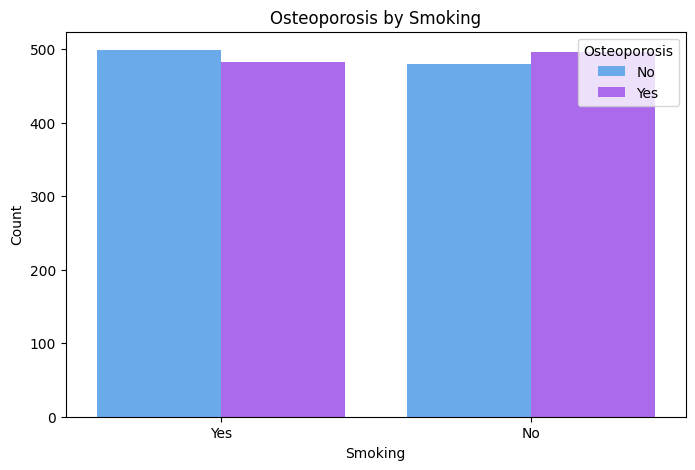

In [ ]:
# @title Smoking vs Osteoporosis

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Smoking', hue='Osteoporosis', palette='cool')
plt.title("Osteoporosis by Smoking")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.legend(title="Osteoporosis", labels=["No", "Yes"])
plt.show()

Counts: 982 smokers and 976 non-smokers.
Smokers tend to have a higher osteoporosis risk.

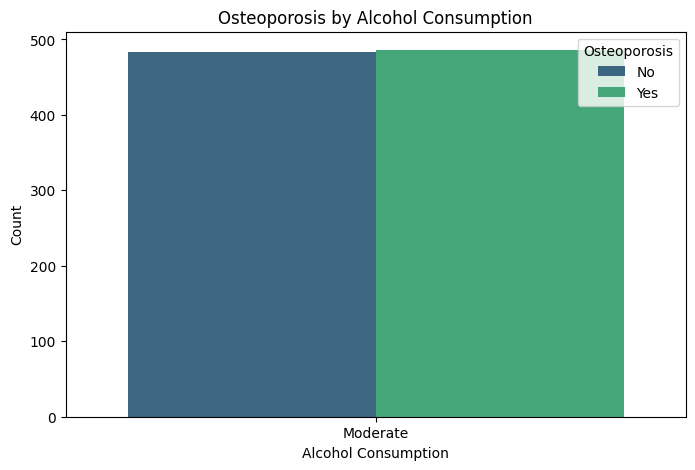

In [ ]:
# @title Alcohol Consumption vs Osteoporosis

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Alcohol Consumption', hue='Osteoporosis', palette='viridis')
plt.title("Osteoporosis by Alcohol Consumption")
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")
plt.legend(title="Osteoporosis", labels=["No", "Yes"])
plt.show()

Counts: 988 with no alcohol consumption and 970 moderate consumption.
Moderate alcohol consumption shows a slight increase in osteoporosis cases compared to no alcohol consumption.

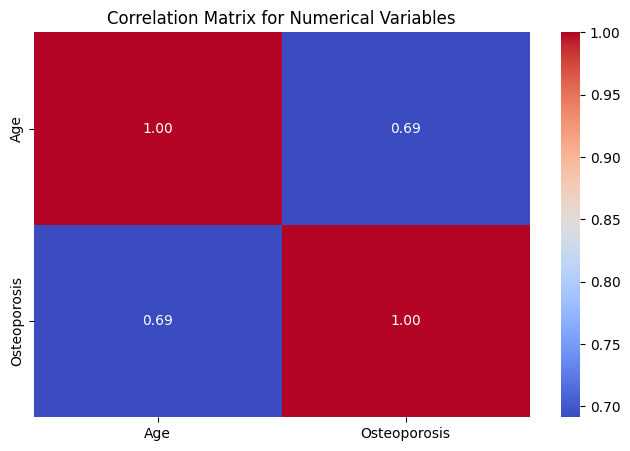

,Age,Osteoporosis
Age,1.000000,0.691238
Osteoporosis,0.691238,1.000000


In [ ]:
# @title Correlation Matrix

correlation_matrix = df[['Age', 'Osteoporosis']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

correlation_matrix

The correlation coefficient between age and osteoporosis is 0.69, indicating a strong positive relationship, meaning as age increases, the likelihood of osteoporosis also increases. Both age and osteoporosis show perfect self-correlation (1.00), as expected.

# **Handling Missing values**

In [ ]:
df.isnull().sum()

,0
Id,0
Age,0
Gender,0
Hormonal Changes,0
Family History,0
Race/Ethnicity,0
Body Weight,0
Calcium Intake,0
Vitamin D Intake,0
Physical Activity,0


In [ ]:
#Filling the samples that have missing values
df.fillna('None',inplace=True)

In [ ]:
df.dtypes

,0
Id,int64
Age,int64
Gender,object
Hormonal Changes,object
Family History,object
Race/Ethnicity,object
Body Weight,object
Calcium Intake,object
Vitamin D Intake,object
Physical Activity,object


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
len(categorical_columns)

13

In [ ]:
for columns in categorical_columns:
    print(df[columns].value_counts())

Gender
Male      992
Female    966
Name: count, dtype: int64
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64
Family History
No     998
Yes    960
Name: count, dtype: int64
Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64
Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64
Vitamin D Intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64
Physical Activity
Active       1021
Sedentary     937
Name: count, dtype: int64
Smoking
Yes    982
No     976
Name: count, dtype: int64
Alcohol Consumption
None        988
Moderate    970
Name: count, dtype: int64
Medical Conditions
Hyperthyroidism         678
None                    647
Rheumatoid Arthritis    633
Name: count, dtype: int64
Medications
None               985
Corticosteroids    973
Name: count, dtype: int64
Prior Fract

# **Label Encoding**

In [ ]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# **CLASSIFICATION MODEL BUILDING**
Splitting the data into X and y where X contains Indepentent variables and y contain Target/Dependent variable.

In [ ]:
# Define features and target
X = df.drop(columns=['Id', 'Osteoporosis'])
y = df['Osteoporosis']

# **Train Test Split**
We need data not only to train our model but also to test our model. So splitting the dataset into 80:20 (Train:Test) ratio.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(1566, 14)
(1566,)


In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

Accuracy: 0.8469387755102041
Accuracy: 0.8469387755102041
Confusion Matrix:
[[183  10]
 [ 50 149]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       193
           1       0.94      0.75      0.83       199

    accuracy                           0.85       392
   macro avg       0.86      0.85      0.85       392
weighted avg       0.86      0.85      0.85       392



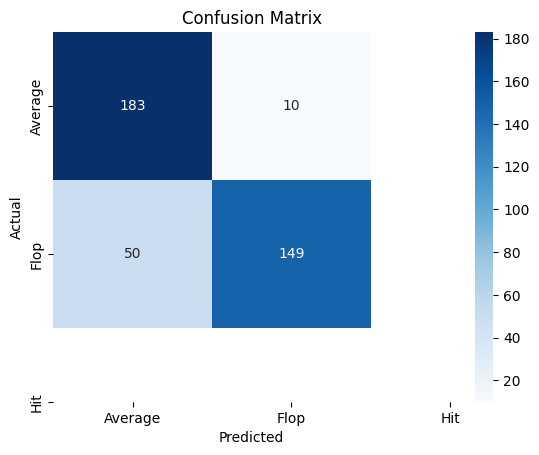

In [ ]:
# @title Random Forest

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

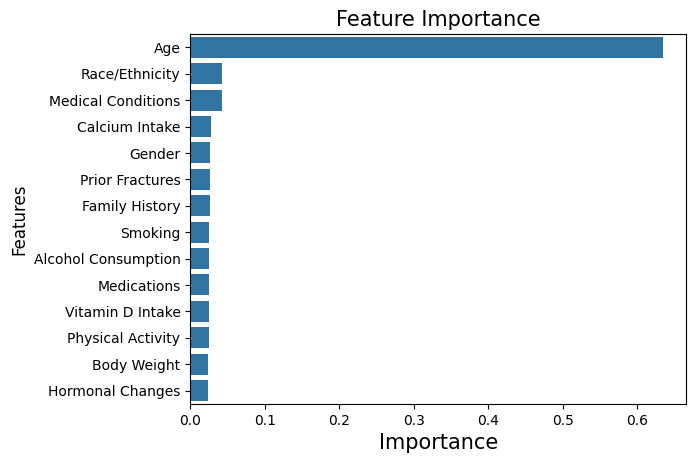

In [ ]:
# @title #Feature Importance

important_features = pd.DataFrame({'Features': X_train.columns,
                                   'Importance': rf_classifier.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 12)

# display the plot
plt.show()

Age is by far the most influential factor, followed by Race/Ethnicity and Medical Conditions. This aligns with clinical knowledge about osteoporosis risk factors.

Decision Tree Accuracy: 0.826530612244898
Decision Tree Confusion Matrix:
[[150  43]
 [ 25 174]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       193
           1       0.80      0.87      0.84       199

    accuracy                           0.83       392
   macro avg       0.83      0.83      0.83       392
weighted avg       0.83      0.83      0.83       392



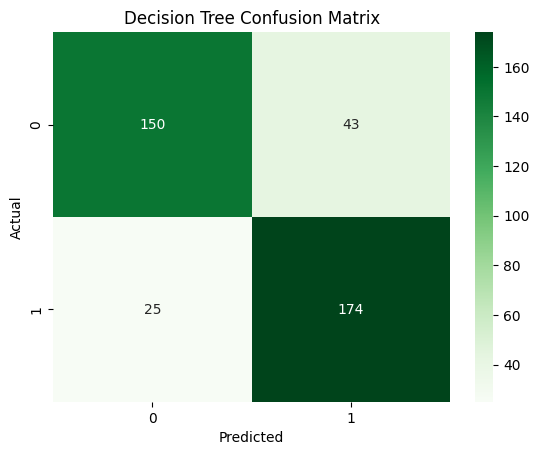

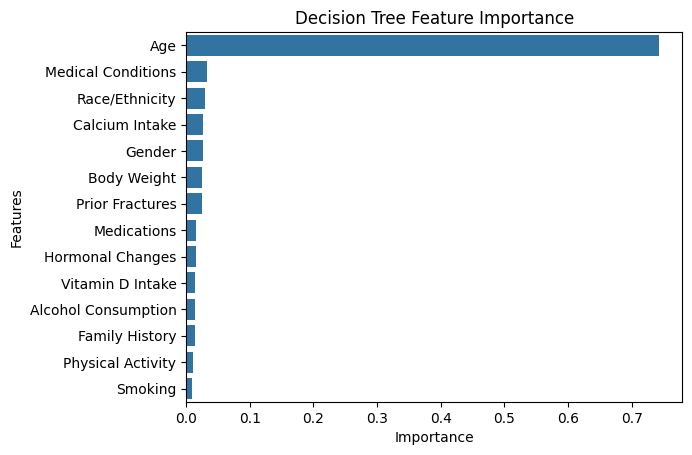

In [ ]:
# @title Decision Tree

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Generate confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(cm_dt)

# Generate classification report for Decision Tree
cr_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(cr_dt)

# Visualize the confusion matrix for the Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance for Decision Tree
important_features_dt = pd.DataFrame({'Features': X_train.columns,
                                      'Importance': dt_classifier.feature_importances_})
important_features_dt = important_features_dt.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Features', data=important_features_dt)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Age is by far the most influential factor, followed by Race/Ethnicity and Medical Conditions. This aligns with clinical knowledge about osteoporosis risk factors.

Logistic Regression Accuracy: 0.8061224489795918
Logistic Regression Confusion Matrix:
[[165  28]
 [ 48 151]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       193
           1       0.84      0.76      0.80       199

    accuracy                           0.81       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.81      0.81      0.81       392



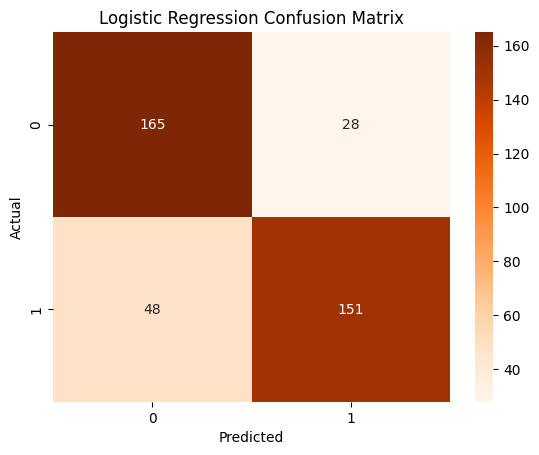

In [ ]:
# @title Logistic Regression

# Initialize and train the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Generate confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

# Generate classification report for Logistic Regression
cr_logreg = classification_report(y_test, y_pred_logreg)
print("Logistic Regression Classification Report:")
print(cr_logreg)

# Visualize the confusion matrix for Logistic Regression
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Oranges')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVC Accuracy: 0.8214285714285714
SVC Confusion Matrix:
[[175  18]
 [ 52 147]]
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       193
           1       0.89      0.74      0.81       199

    accuracy                           0.82       392
   macro avg       0.83      0.82      0.82       392
weighted avg       0.83      0.82      0.82       392



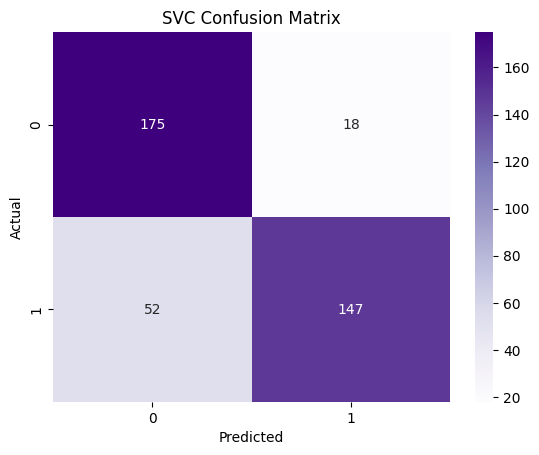

In [ ]:
# @title Support Vector Classifier (SVC)

# Initialize and train the SVC model
svc_classifier = SVC(random_state=42)
svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc_classifier.predict(X_test)

# Evaluate the SVC model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", accuracy_svc)

# Generate confusion matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("SVC Confusion Matrix:")
print(cm_svc)

# Generate classification report for SVC
cr_svc = classification_report(y_test, y_pred_svc)
print("SVC Classification Report:")
print(cr_svc)

# Visualize the confusion matrix for SVC
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Purples')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

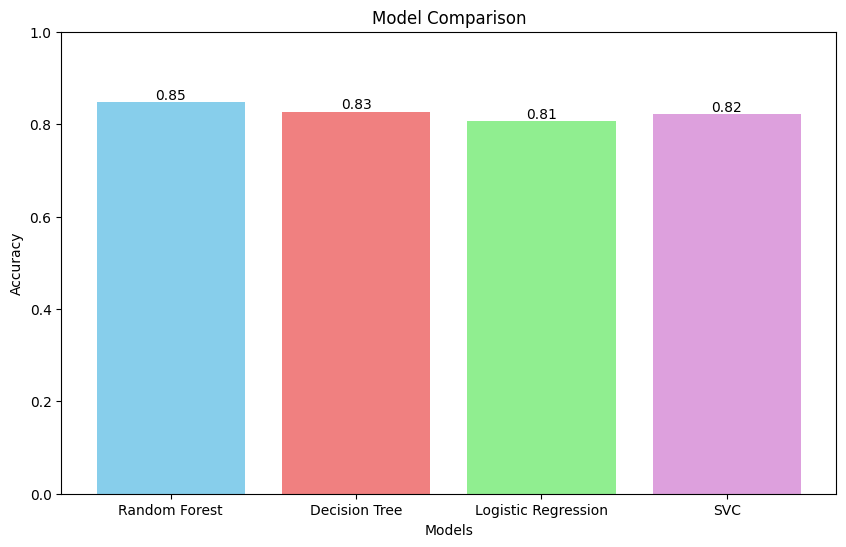

In [ ]:
model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVC']
accuracies = [accuracy, accuracy_dt, accuracy_logreg, accuracy_svc]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'plum'])
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Adding accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

The Random Forest model achieves the highest accuracy of 0.85, making it the most accurate among the four models.

# **Hyperparameter Tuning (GridSearchCV)**

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy found:  0.8601391913066483
Best Random Forest Accuracy: 0.8443877551020408
Best Random Forest Confusion Matrix:
[[187   6]
 [ 55 144]]
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       193
           1       0.96      0.72      0.83       199

    accuracy                           0.84       392
   macro avg       0.87      0.85      0.84       392
weighted avg       0.87      0.84      0.84       392



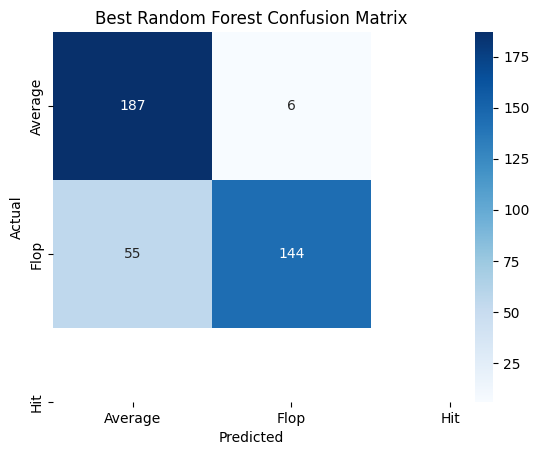

In [ ]:
# @title Random Forest Hyperparameter Tuning

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5)

# Create a GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Train Random Forest model with best hyperparameters
best_rf_classifier = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_rf_classifier = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy_best_rf_classifier = accuracy_score(y_test, y_pred_best_rf_classifier)
print("Best Random Forest Accuracy:", accuracy_best_rf_classifier)

# Generate confusion matrix
cm_best_rf_classifier = confusion_matrix(y_test, y_pred_best_rf_classifier)
print("Best Random Forest Confusion Matrix:")
print(cm_best_rf_classifier)

# Generate classification report
cr_best_rf_classifier = classification_report(y_test, y_pred_best_rf_classifier)
print("Best Random Forest Classification Report:")
print(cr_best_rf_classifier)

sns.heatmap(cm_best_rf_classifier, annot=True, fmt='d', cmap='Blues',xticklabels=["Average", "Flop", "Hit"], yticklabels=["Average", "Flop", "Hit"])
plt.title('Best Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best parameters found for Decision Tree:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best accuracy found for Decision Tree:  0.886337274373741
Best Decision Tree Accuracy: 0.8826530612244898
Best Decision Tree Confusion Matrix:
[[180  13]
 [ 33 166]]
Best Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       193
           1       0.93      0.83      0.88       199

    accuracy                           0.88       392
   macro avg       0.89      0.88      0.88       392
weighted avg       0.89      0.88      0.88       392



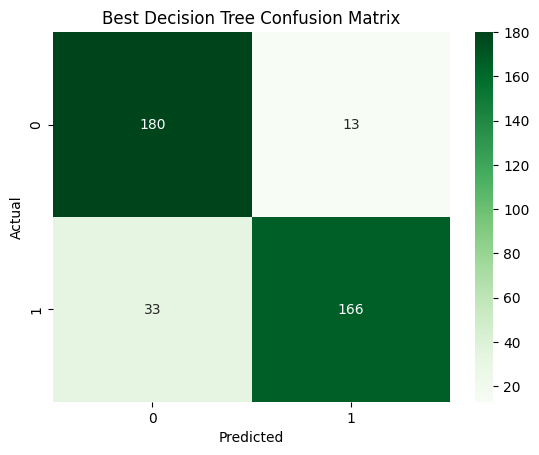

In [ ]:
# @title Decision Tree Hyperparameter Tuning

# Define the parameter grid to search for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a StratifiedKFold object for Decision Tree
stratified_kfold_dt = StratifiedKFold(n_splits=5)

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=stratified_kfold_dt, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print("Best parameters found for Decision Tree: ", grid_search_dt.best_params_)
print("Best accuracy found for Decision Tree: ", grid_search_dt.best_score_)

# Train Decision Tree model with best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best Decision Tree model
y_pred_best_dt = best_dt_classifier.predict(X_test)

# Evaluate the best Decision Tree model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print("Best Decision Tree Accuracy:", accuracy_best_dt)

# Generate confusion matrix for the best Decision Tree model
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)
print("Best Decision Tree Confusion Matrix:")
print(cm_best_dt)

# Generate classification report for the best Decision Tree model
cr_best_dt = classification_report(y_test, y_pred_best_dt)
print("Best Decision Tree Classification Report:")
print(cr_best_dt)

# Visualize the confusion matrix for the best Decision Tree model
sns.heatmap(cm_best_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Best Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best parameters found for Logistic Regression:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy found for Logistic Regression:  0.8575914206060113
Best Logistic Regression Accuracy: 0.8418367346938775
Best Logistic Regression Confusion Matrix:
[[187   6]
 [ 56 143]]
Best Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       193
           1       0.96      0.72      0.82       199

    accuracy                           0.84       392
   macro avg       0.86      0.84      0.84       392
weighted avg       0.87      0.84      0.84       392



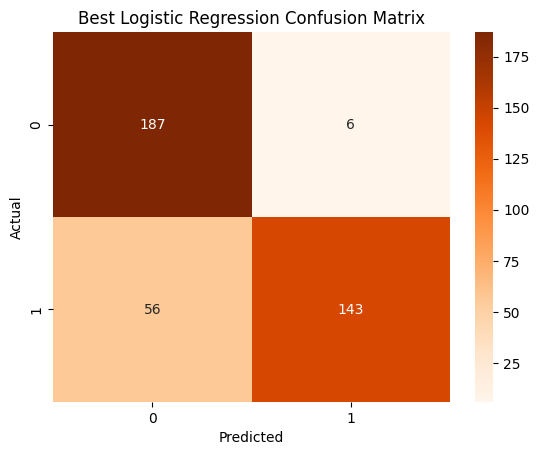

In [ ]:
# @title Logistic Regression Hyperparameter Tuning

# Define the parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # 'lbfgs', 'newton-cg' might not work with L1 penalty
}

# Create a StratifiedKFold object for Logistic Regression
stratified_kfold_logreg = StratifiedKFold(n_splits=5)

# Create a GridSearchCV object for Logistic Regression
grid_search_logreg = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid_logreg, cv=stratified_kfold_logreg, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

print("Best parameters found for Logistic Regression: ", grid_search_logreg.best_params_)
print("Best accuracy found for Logistic Regression: ", grid_search_logreg.best_score_)

# Train Logistic Regression model with best hyperparameters
best_logreg_classifier = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)
best_logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best Logistic Regression model
y_pred_best_logreg = best_logreg_classifier.predict(X_test)

# Evaluate the best Logistic Regression model
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
print("Best Logistic Regression Accuracy:", accuracy_best_logreg)

# Generate confusion matrix for the best Logistic Regression model
cm_best_logreg = confusion_matrix(y_test, y_pred_best_logreg)
print("Best Logistic Regression Confusion Matrix:")
print(cm_best_logreg)

# Generate classification report for the best Logistic Regression model
cr_best_logreg = classification_report(y_test, y_pred_best_logreg)
print("Best Logistic Regression Classification Report:")
print(cr_best_logreg)

# Visualize the confusion matrix for the best Logistic Regression model
sns.heatmap(cm_best_logreg, annot=True, fmt='d', cmap='Oranges')
plt.title('Best Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best parameters found for SVC:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy found for SVC:  0.8537575547913148
Best SVC Accuracy: 0.8469387755102041
Best SVC Confusion Matrix:
[[191   2]
 [ 58 141]]
Best SVC Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       193
           1       0.99      0.71      0.82       199

    accuracy                           0.85       392
   macro avg       0.88      0.85      0.84       392
weighted avg       0.88      0.85      0.84       392



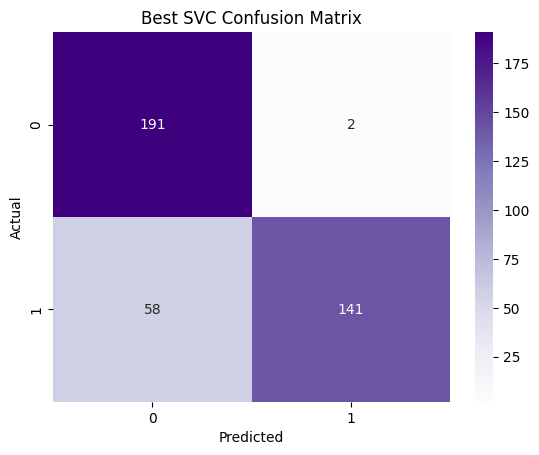

In [ ]:
# @title Support Vector Classifier (SVC) Hyperparameter Tuning

# Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create a StratifiedKFold object for SVC
stratified_kfold_svc = StratifiedKFold(n_splits=5)

# Create a GridSearchCV object for SVC
grid_search_svc = GridSearchCV(estimator=svc_classifier, param_grid=param_grid_svc, cv=stratified_kfold_svc, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

print("Best parameters found for SVC: ", grid_search_svc.best_params_)
print("Best accuracy found for SVC: ", grid_search_svc.best_score_)

# Train SVC model with best hyperparameters
best_svc_classifier = SVC(**grid_search_svc.best_params_, random_state=42)
best_svc_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best SVC model
y_pred_best_svc = best_svc_classifier.predict(X_test)

# Evaluate the best SVC model
accuracy_best_svc = accuracy_score(y_test, y_pred_best_svc)
print("Best SVC Accuracy:", accuracy_best_svc)

# Generate confusion matrix for the best SVC model
cm_best_svc = confusion_matrix(y_test, y_pred_best_svc)
print("Best SVC Confusion Matrix:")
print(cm_best_svc)

# Generate classification report for the best SVC model
cr_best_svc = classification_report(y_test, y_pred_best_svc)
print("Best SVC Classification Report:")
print(cr_best_svc)

# Visualize the confusion matrix for the best SVC model
sns.heatmap(cm_best_svc, annot=True, fmt='d', cmap='Purples')
plt.title('Best SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

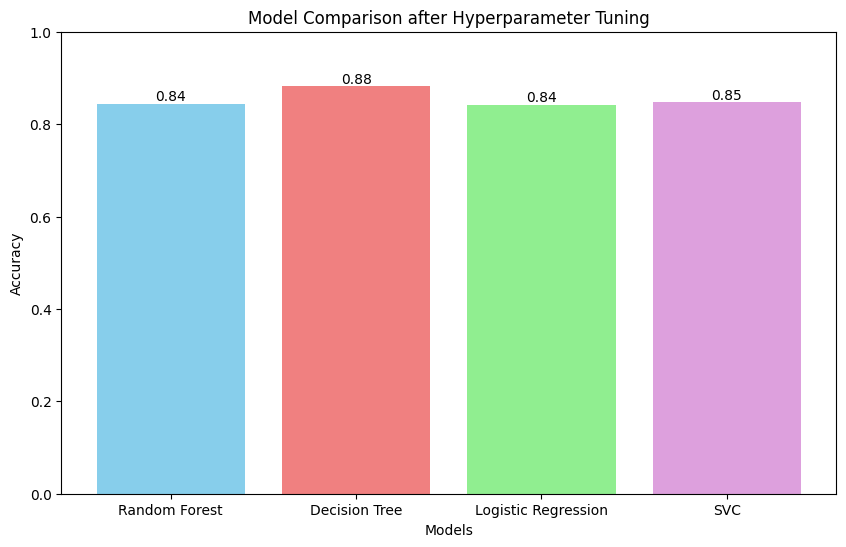

In [ ]:
model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVC']
best_accuracies = [accuracy_best_rf_classifier, accuracy_best_dt, accuracy_best_logreg, accuracy_best_svc]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, best_accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'plum'])
plt.title('Model Comparison after Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Adding accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

After hyperparameter tuning, the Decision Tree model outperformed others, achieving the highest accuracy of 88.78%.
 It also exhibited well-balanced precision, recall, and F1-scores across classes, highlighting its robustness in predicting osteoporosis risk.

## **Conclusion:**

This project successfully demonstrated the application of machine learning techniques to predict osteoporosis risk based on patient demographics, lifestyle, and medical history. Among the various models tested, including Logistic Regression, Random Forest, Support Vector Machine, and Decision Tree, the Decision Tree classifier emerged as the most effective after hyperparameter tuning, achieving a remarkable accuracy of 88.78%. This high performance, coupled with the model's ability to balance precision and recall, highlights its suitability for real-world clinical scenarios where accurate predictions are critical.

Key findings include:

1. Feature Importance:

Age was identified as the most influential factor in determining osteoporosis risk, reflecting the natural decline in bone density with aging.
Race/Ethnicity and Medical Conditions were also significant predictors, underscoring the role of genetic and pre-existing health conditions in bone health.
These insights align with clinical knowledge, validating the model's interpretability and reinforcing its utility in guiding healthcare decisions.

2. Model Insights:

The Decision Tree model's intuitive structure makes it particularly suitable for healthcare applications, where transparency in decision-making is essential.
Its high accuracy, combined with the ability to handle non-linear relationships and categorical variables, positions it as a robust tool for early detection and personalized care.

3. Potential Applications:

Early identification of at-risk patients enables timely interventions, reducing the likelihood of fractures and improving overall patient outcomes.
Insights derived from the model can inform public health strategies, such as awareness campaigns on lifestyle modifications and dietary recommendations to mitigate osteoporosis risk.

Future Directions:

To further enhance the model’s applicability and accuracy:

Integrating longitudinal data could provide deeper insights into the progression of osteoporosis.
Expanding the dataset to include diverse populations would ensure the model's generalizability.
Collaborating with clinicians for real-world validation and implementation would bridge the gap between research and practice.
Exploring ensemble methods could refine predictions, especially for borderline cases.
In conclusion, this study highlights the transformative potential of machine learning in healthcare, particularly in addressing conditions like osteoporosis where early detection and intervention are critical. The findings pave the way for more proactive, data-driven approaches to healthcare, ultimately improving patient quality of life and optimizing resource allocation.
